In [1]:
import io

import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# CSV 数据
data = """
Array Size,Depth,Time (seconds),Success
1000,5,0.005392,true
1000,8,0.000148,true
1000,10,0.000151,true
10000,5,0.005111,true
10000,8,0.000254,true
10000,10,0.000414,true
100000,5,0.000947,true
100000,8,0.003079,true
100000,10,0.001315,true
1000000,5,0.012315,true
1000000,8,0.009194,true
1000000,10,0.009971,true
10000000,5,0.135189,true
10000000,8,0.103922,true
10000000,10,0.10051,true
100000000,5,1.47982,true
100000000,8,1.29516,true
100000000,10,1.13882,true
"""

# 将 CSV 数据加载为 Pandas DataFrame
df = pd.read_csv(io.StringIO(data))

# 创建 Plotly 图表对象
fig = go.Figure()

# 根据深度绘制多折线图
for depth in df["Depth"].unique():
    df_depth = df[df["Depth"] == depth]
    fig.add_trace(
        go.Scatter(
            x=df_depth["Array Size"],
            y=df_depth["Time (seconds)"],
            mode="lines+markers",
            name=f"Depth {depth}",
        )
    )

# 设置图表的标签、标题
fig.update_layout(
    title="Array Size vs Time for Different Depths",
    xaxis=dict(title="Array Size", type="log"),  # x 轴设置为对数刻度
    yaxis=dict(title="Time (seconds)"),
    legend_title="Depth",
    hovermode="x unified",
)

# 显示图表
pio.write_image(fig, "high_res_plot.png", scale=3)  # scale 控制分辨率，值越大分辨率越高


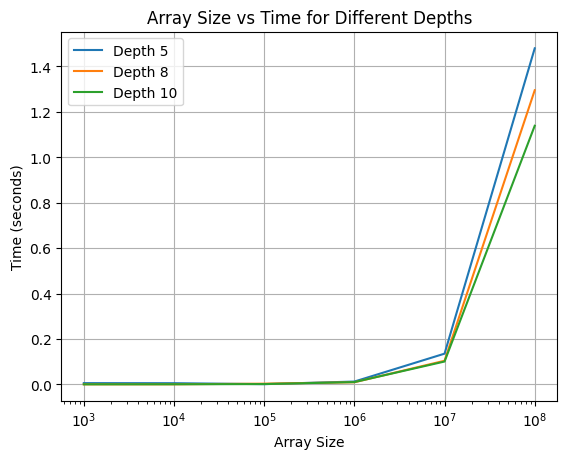

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import io

# CSV 数据
data = """
Array Size,Depth,Time (seconds),Success
1000,5,0.005392,true
1000,8,0.000148,true
1000,10,0.000151,true
10000,5,0.005111,true
10000,8,0.000254,true
10000,10,0.000414,true
100000,5,0.000947,true
100000,8,0.003079,true
100000,10,0.001315,true
1000000,5,0.012315,true
1000000,8,0.009194,true
1000000,10,0.009971,true
10000000,5,0.135189,true
10000000,8,0.103922,true
10000000,10,0.10051,true
100000000,5,1.47982,true
100000000,8,1.29516,true
100000000,10,1.13882,true
"""

# 将 CSV 数据加载为 Pandas DataFrame
df = pd.read_csv(io.StringIO(data))

# 根据深度绘制多折线图
for depth in df["Depth"].unique():
    df_depth = df[df["Depth"] == depth]
    plt.plot(df_depth["Array Size"], df_depth["Time (seconds)"], label=f"Depth {depth}")

# 设置图例和标签
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.title("Array Size vs Time for Different Depths")
plt.legend()

# 显示图形
plt.xscale("log")  # 使用对数刻度展示
plt.grid(True)
plt.show()